In [1]:
%matplotlib inline

n=0

def plot_line(X, y, w):
    '''plot a line with coefs (w[0], w[1]) and dots (X, y) 
       The line is: yy = w[0]*xx + w[1] 
    '''
    
    global n
    n += 1
    fig = plt.figure(n)
    ax = fig.gca()  
    
    ax.scatter(X, y)

    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    xx = np.linspace(xmin, xmax)
    yy = w[0] * xx + w[1]

    # Plot the hyperplane
    ax.plot(xx, yy)

    ax.set_autoscale_on(False)
    ax.axis([xmin, xmax, ymin, ymax])
     
    return

In [2]:
def plot_plane(X, y, w):
    '''plot a plane with coefs (w[0], w[1], w[2]), and dots that have coords in (X[:,0], X[:,1], y)
       The plane is: zz = w[0]*xx + w[1]*yy + w[2] 
    '''
    global n
    n += 1
    ax = Axes3D(plt.figure(n))
    ax.scatter(X[:,0], X[:,1], y)

    Xmin, Xmax = ax.get_xlim()
    Ymin, Ymax = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(Xmin, Xmax, 10), np.linspace(Ymin, Ymax, 10))

    zz = w[0] * xx + w[1] * yy + w[2]
    #print(zz)

    ax.plot_surface(xx, yy, zz, alpha=0.2)
    plt.xlabel("x1")
    plt.ylabel("x2")
    
    return

The data are generated with coefs: [ 48.62246887  66.94653066] 10.0
The data are regressed to coefs: [ 48.67854038  66.14861199] 10.7973181915


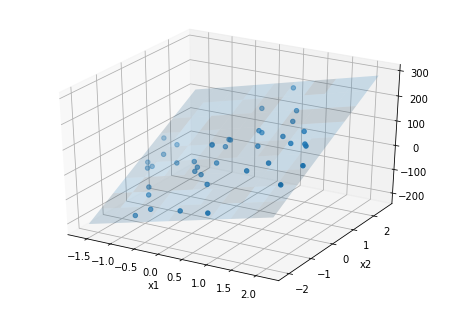

The data are generated with coefs: 81.3993217897562 10.0
The data are regressed to coefs: [ 81.35490987] 10.5936314897


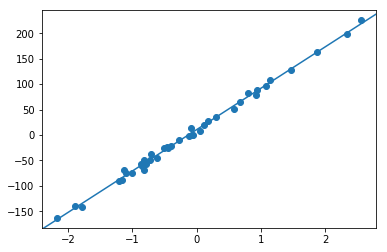

In [82]:
# use scikit-learn implementation

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_regression
from sklearn.linear_model import ridge

def plane_regression():
    bias = 10.0
    # we create regressable points with 2 features (x1, x2)
    X, y, coef = make_regression(n_samples=40, n_features=2, noise=5, coef=True, bias=bias)

    # the coef and bias 
    print("The data are generated with coefs:", coef, bias)

    # ridge regression that uses least square error plus l2-norm regularization
    net = ridge.Ridge(fit_intercept=True, alpha=0.1)
    net.fit(X, y)
    #compare with the input values above: coef, intercept 
    print("The data are regressed to coefs:", net.coef_, net.intercept_)

    # output figure
    w = [net.coef_[0], net.coef_[1], net.intercept_]
    plot_plane(X, y, w)
    
    '''
    # the followings are only for fun
    # plot the line in the plane where yy = 0
    plot_line(X[:,0], y, [w[0], w[2]])
    plt.title("Line in the plane where x2=0")
    plt.xlabel("x1")

    # plot the line in the plane where xx = 0
    plot_line(X[:,1], y, [w[0], w[2]])
    plt.title("Line in the plane where x1=0")  
    plt.xlabel("x2")
    '''
    plt.show()
    return

def line_regression():
    bias = 10.0
    # we create regressable points with 1 feature x1
    X, y, coef = make_regression(n_samples=40, n_features=1, noise=5, coef=True, bias=bias)

    print("The data are generated with coefs:", coef, bias)

    # ridge regression that uses least square error plus l2-norm regularization
    net = ridge.Ridge(fit_intercept=True, alpha=0.1)
    net.fit(X, y)
    #compare with the input values above: coef, intercept 
    print("The data are regressed to coefs:", net.coef_, net.intercept_)

    # output figure
    w = [net.coef_[0], net.intercept_]
    plot_line(X, y, w)

    plt.show()
    return

plane_regression()
line_regression()

The data are generated with coefs: 78.83640615889098 10.0
The data are regressed to coefs: [75.44792280137044, 11.54255817443136]


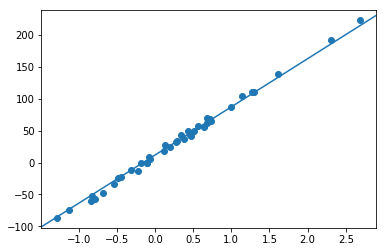

The data are generated with coefs: [ 16.0301609    7.56556437] 10.0
The data are regressed to coefs: [15.646432847089006, 7.831589682866003, 8.326066470312911]


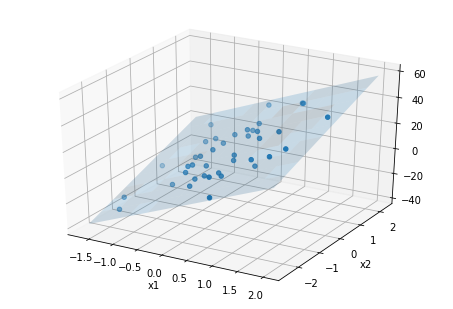

In [81]:
# self implementation with gradient descent

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_regression
from sklearn.linear_model import ridge

def ridge_regression(X, y, max_iter=10, alpha=0.5, lamda=0.01):
    ''' 
    We use the MSE + weight-decay for the cost, and gradient descent to update w 
    That is, w = (1 - lamda) * w − alpha * X.T * (X * w − y) / n, for all X and y in one iteration.
    SGD solution is provided in another function.
    '''  
    n, k = X.shape
    T = np.ones(shape=(n, k+1))
    T[:, :k] = X
    XX = np.matrix(T)
    yy = np.matrix(y)
    yy = yy.T
    w = np.matrix(np.zeros(k+1)).T
        
    for it in range(max_iter):

        derivative = XX.T * (XX * w - yy) / n
        # print(w)
        # with weight-decay
        w = (1 - lamda) * w - alpha * derivative 
        # without weight-decay regularization
        # w = w - alpha * derivative 

    # make the (k+1)x1 matrix into a k+1 element list 
    return w.flatten().tolist()[0]

bias = 10.0
n_features = 1
X, y, coef = make_regression(n_samples=40, n_features=n_features, noise=5, coef=True, bias=bias)
print("The data are generated with coefs:", coef, bias)

net = ridge_regression(X, y)
print("The data are regressed to coefs:", net)

# output figure
plot_line(X, y, net)
plt.show()

n_features = 2
X, y, coef = make_regression(n_samples=40, n_features=n_features, noise=5, coef=True, bias=bias)
print("The data are generated with coefs:", coef, bias)

net = ridge_regression(X, y)
print("The data are regressed to coefs:", net)

plot_plane(X, y, net)
plt.show()


The data are generated with coefs: 53.10069805383309 10.0
The data are regressed to coefs: [50.56513884972564, 10.32529109604695]


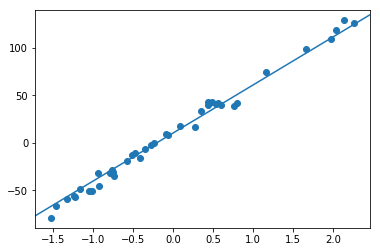

The data are generated with coefs: [ 62.78169185  37.7341702 ] 10.0
The data are regressed to coefs: [55.9267514272036, 35.02972518190398, 10.404355956384888]


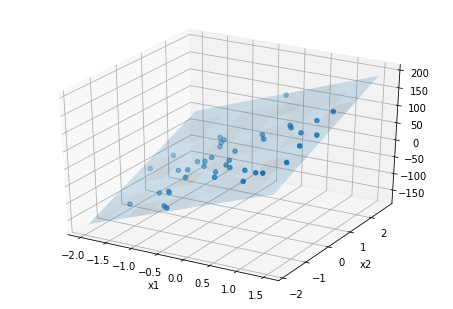

In [86]:
# self implementation with stochastic gradient descent

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_regression
from sklearn.linear_model import ridge

def ridge_regression_SGD_1(X, y, max_iter=10, alpha=0.5, lamda=0.01):
    ''' 
    We use the MSE + weight-decay for the cost, and stochastic gradient descent to update w 
    w = (1 - lamda) * w − alpha * Xi.T * (Xi * w − yi), for single X and y in one iteration.
    i.e., batch size = 1. In this case, we don't bother to use matrix representation
    '''  
    n, k = X.shape
    T = np.ones(shape=(n, k+1))
    T[:, :k] = X
    XX = T
    yy = y
    w = np.zeros(k+1)

    for it in range(max_iter):
        for i in range(y.size):
            derivative = XX[i] * (np.dot(XX[i], w) - yy[i])
            # print(w)
            # with weight-decay
            w = (1 - lamda) * w - alpha * derivative 
            # without weight-decay regularization
            # w = w - alpha * derivative 

    # make the (k+1)x1 matrix into a k+1 element list 
    return w

def ridge_regression_SGD_batch(X, y, max_iter=10, alpha=0.5, lamda=0.01, batch_size=10):
    ''' 
    We use the MSE + weight-decay for the cost, and stochastic gradient descent to update w 
    w = (1 - lamda) * w − alpha * X.T * (X * w − y) / n, for a batch of X and y in one iteration.
    batch size is the number of samples used for training. 
    When batch_size = 1, this function implements the same thing as the one above, but a little more expensive.
    '''  
    n, k = X.shape
    T = np.ones(shape=(n, k+1))
    T[:, :k] = X
    XX = np.matrix(T)
    yy = np.matrix(y)
    yy = yy.T
    w = np.matrix(np.zeros(k+1)).T
    
    N = y.size
    num_batch = -(-N // batch_size)  # this is a trick to find the ceiling division
    # batch data structure
    Xb = np.matrix(np.empty(shape=(batch_size,k+1)))
    yb = np.matrix(np.empty(batch_size))
    for j in range(max_iter):
        # simulate the batch sampling by shifting the batch offset by one for every epoch
        shift = j % batch_size
        for i in range(num_batch):
            s = (i * batch_size + shift) % N
            t = s + batch_size
            if(t > N): # deal with the case when the last batch wraps around
                d = N - s
                e = t - N
                Xb[:d, :] = XX[s:N, :]
                yb[:d] = yy[s:N]
                Xb[d:, :] = XX[:e, :]
                yb[d:] = yy[:e]
            else:                
                Xb = XX[s:t, :]
                yb = yy[s:t]

            derivative = Xb.T * (Xb * w - yb) / n
            # print(w)
            # with weight-decay
            w = (1 - lamda) * w - alpha * derivative 
            # without weight-decay regularization
            # w = w - alpha * derivative 

    # make the (k+1)x1 matrix into a k+1 element list 
    return w.flatten().tolist()[0]

ridge_regression = lambda x, y: ridge_regression_SGD_batch(x, y, max_iter=10, alpha=0.5, lamda=0.01, batch_size=10)

bias = 10.0
n_features = 1
X, y, coef = make_regression(n_samples=40, n_features=n_features, noise=5, coef=True, bias=bias)
print("The data are generated with coefs:", coef, bias)

net = ridge_regression(X, y)
print("The data are regressed to coefs:", net)

# output figure
plot_line(X, y, net)
plt.show()

n_features = 2
X, y, coef = make_regression(n_samples=40, n_features=n_features, noise=5, coef=True, bias=bias)
print("The data are generated with coefs:", coef, bias)

net = ridge_regression(X, y)
print("The data are regressed to coefs:", net)

plot_plane(X, y, net)
plt.show()
